In [39]:
# Imports

from cltkreaders.grc import GreekTesseraeCorpusReader
from pprint import pprint

In [3]:
# Setup corpus

T = GreekTesseraeCorpusReader()

ROOT = /Users/diyclassics_2/cltk_data/grc/text/grc_text_tesserae/texts


In [6]:
clouds = 'aristophanes.clouds.tess'
clouds_words = T.words(clouds)

In [11]:
for word in clouds_words:
    if word == 'κόσμος':
        print('Found one!')

Found one!


In [26]:
clouds_lines = next(T.doc_rows(clouds))
clouds_lines = list(clouds_lines.items())

In [28]:
clouds_lines[:5]

[('<aristoph. clouds. 1>', 'ἰοὺ ἰού:'),
 ('<aristoph. clouds. 2>', 'ὦ Ζεῦ βασιλεῦ τὸ χρῆμα τῶν νυκτῶν ὅσον:'),
 ('<aristoph. clouds. 3>', "ἀπέραντον. οὐδέποθ' ἡμέρα γενήσεται;"),
 ('<aristoph. clouds. 4>', "καὶ μὴν πάλαι γ' ἀλεκτρυόνος ἤκους' ἐγώ:"),
 ('<aristoph. clouds. 5>', "οἱ δ' οἰκέται ῥέγκουσιν: ἀλλ' οὐκ ἂν πρὸ τοῦ.")]

In [32]:
for citation, line in clouds_lines:
    if 'κόσμος' in line:
        print('-----')
        print(citation)
        print(line)
        print('-----')

-----
<aristoph. clouds. 914>
νῦν δέ γε κόσμος τοῦτ' ἐστὶν ἐμοί.
-----


In [36]:
for file in T.fileids()[:5]:
    lines = next(T.doc_rows(file))
    lines = list(lines.items())
    for citation, line in lines:
        if 'κόσμος' in line:
            print(citation)  

    

<Ach. Tat.  2.1.2>
<Ach. Tat.  2.11.4>
<Ael. NA 3.42>
<Ael. VH 2.14>
<Ael. VH 12.1>


In [40]:
from collections import defaultdict

kosmos_counts = defaultdict(int)

for file in T.fileids()[:5]:
    lines = next(T.doc_rows(file))
    lines = list(lines.items())
    for citation, line in lines:
        if 'κόσμος' in line:
            kosmos_counts[file] += 1

pprint(kosmos_counts)  



defaultdict(<class 'int'>,
            {'achilles_tatius.leucippe_et_clitophon.tess': 2,
             'aelian.de_natura_animalium.tess': 1,
             'aelian.varia_historia.tess': 2})


In [43]:
kosmos_counts = defaultdict(int)

for file in T.fileids():
    lines = next(T.doc_rows(file))
    lines = list(lines.items())
    for citation, line in lines:
        if 'κόσμος' in line:
            kosmos_counts[file] += 1

In [44]:
'aristophanes.clouds.tess' in kosmos_counts.keys()

True

In [158]:
# importing the required library
import seaborn as sns
import matplotlib.pyplot as plt
pal = sns.color_palette("colorblind")

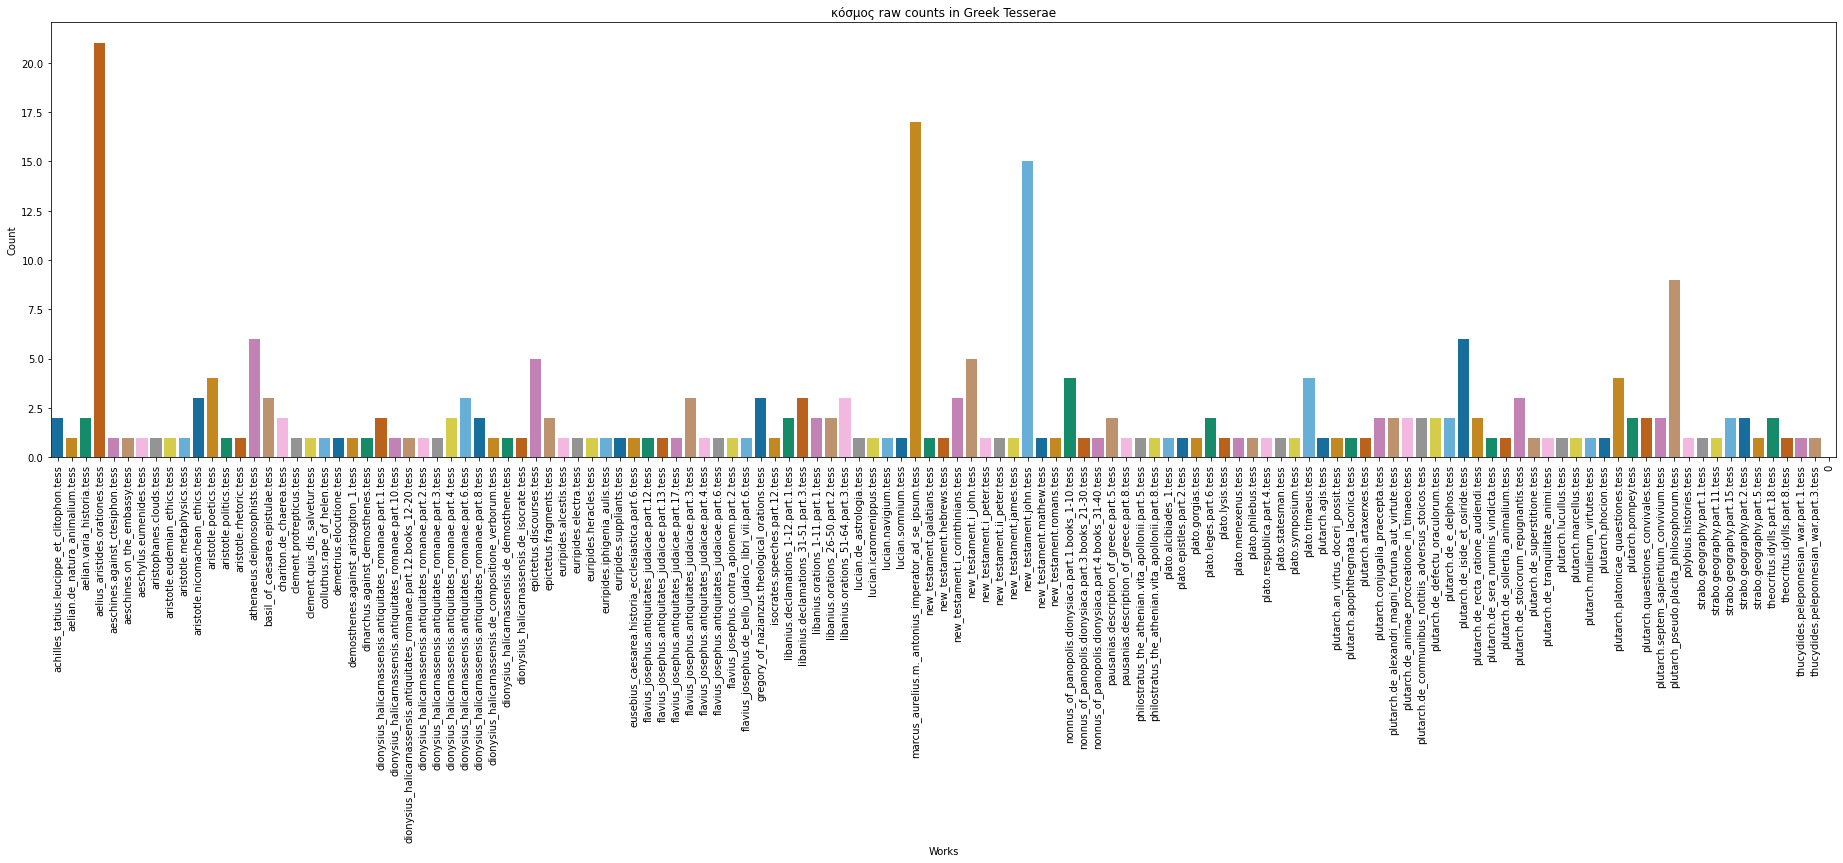

In [159]:
keys = list(kosmos_counts.keys())
vals = list(kosmos_counts.values())

plt.figure(figsize=(32, 8))
ax = sns.barplot(x=keys, y=vals, palette=pal);
plt.xlabel('Works')
plt.ylabel('Count')
plt.title('κόσμος raw counts in Greek Tesserae')
ax.set_xticklabels(labels=keys, rotation=90);
plt.show()


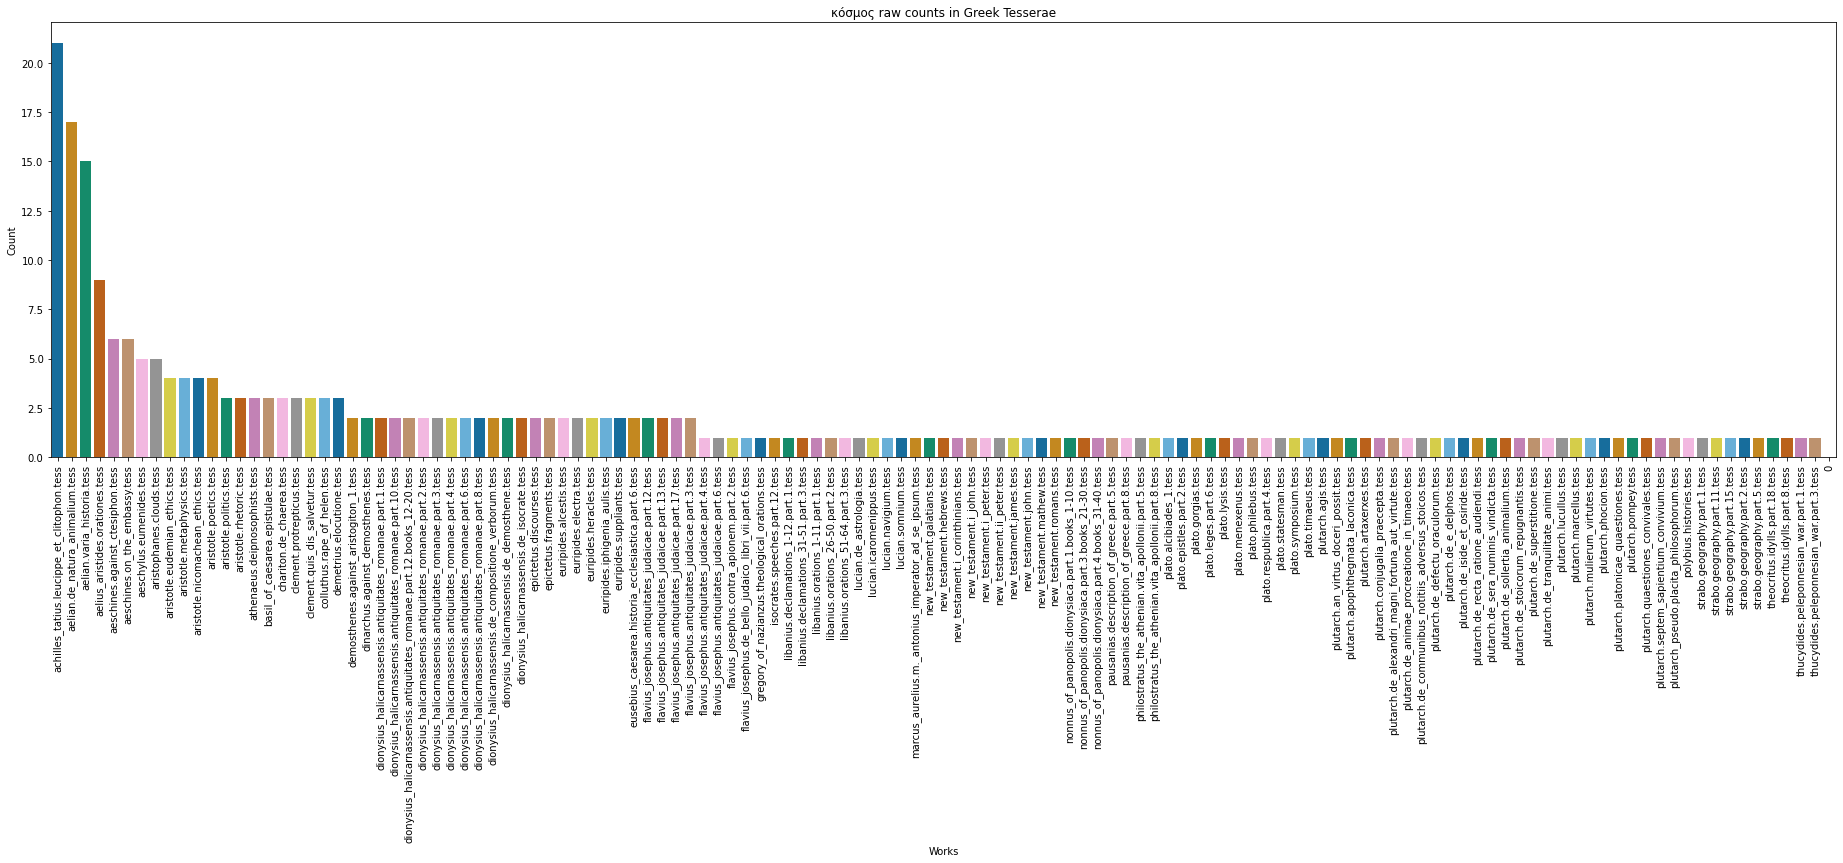

In [160]:
kosmos_counts_sorted = dict(sorted(list(kosmos_counts.items()), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(32, 8))
ax = sns.barplot(x=list(kosmos_counts_sorted.keys()), y=list(kosmos_counts_sorted.values()), palette=pal);
plt.xlabel('Works')
plt.ylabel('Count')
plt.title('κόσμος raw counts in Greek Tesserae')
ax.set_xticklabels(labels=keys, rotation=90);
plt.show()


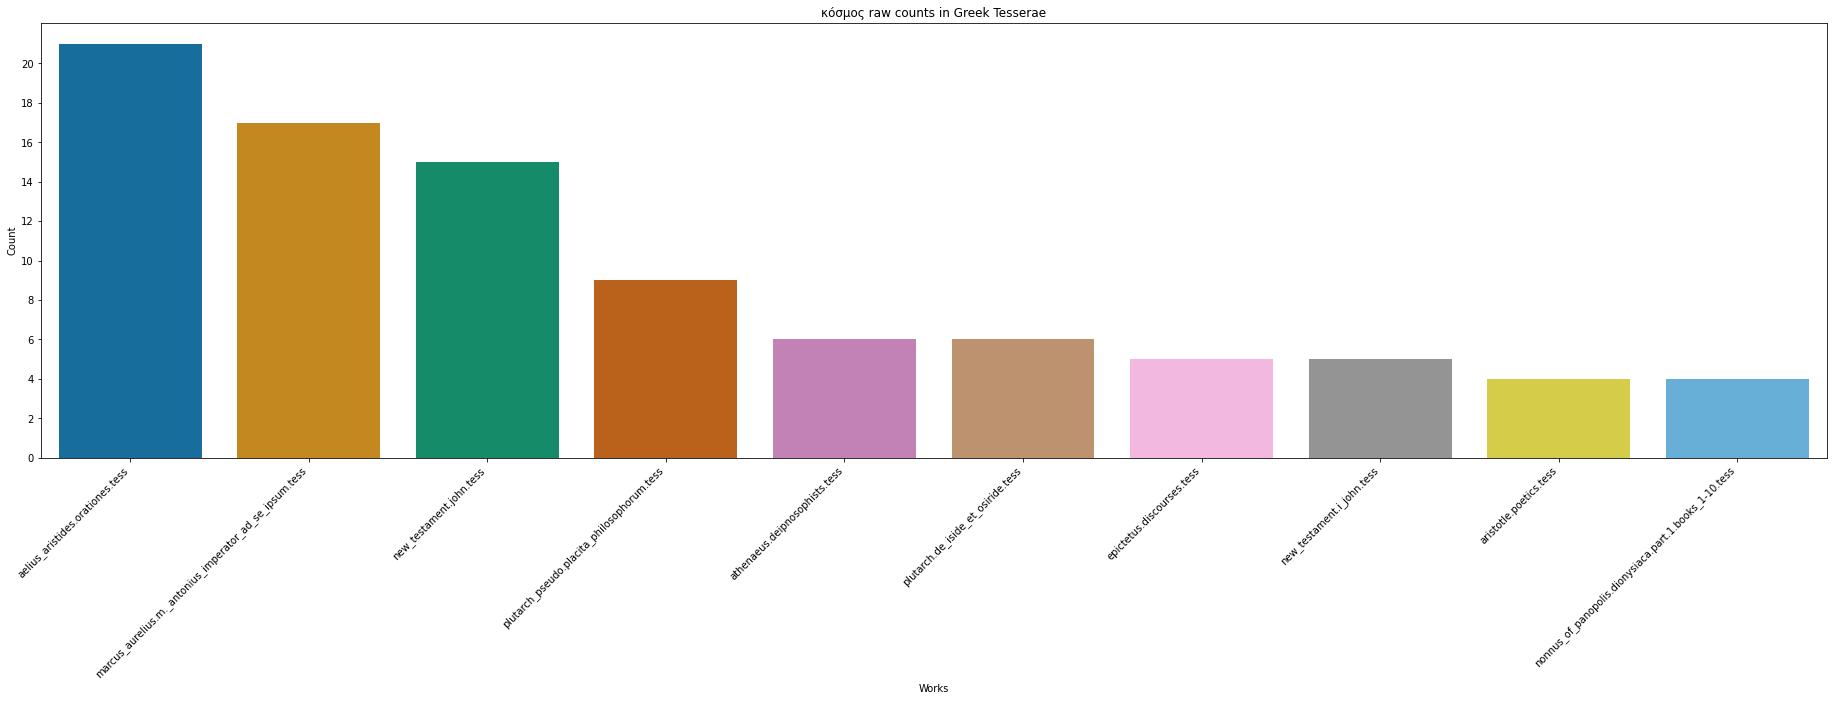

In [161]:
kosmos_counts_sorted = dict(sorted(list(kosmos_counts.items()), key=lambda x: x[1], reverse=True)[:10])
keys = list(kosmos_counts_sorted.keys())
vals = list(kosmos_counts_sorted.values())

plt.figure(figsize=(32, 8))
ax = sns.barplot(x=keys, y=vals, palette=pal);
plt.xlabel('Works')
plt.ylabel('Count')
plt.title('κόσμος raw counts in Greek Tesserae')
ax.set_xticklabels(labels=keys, rotation=45, horizontalalignment='right');
ax.set_yticks(range(0, max(vals), 2))
plt.show()


In [104]:
word_counts = defaultdict(int)

for file in T.fileids():
    word_count = len(list(T.words(file)))
    word_counts[file] = word_count


['achilles_tatius.leucippe_et_clitophon.tess', 'aelian.de_natura_animalium.tess', 'aelian.epistulae_rusticae.tess', 'aelian.varia_historia.tess', 'aelius_aristides.ars_rhetorica.tess']


In [106]:
print(list(word_counts.items())[:5])    

[('achilles_tatius.leucippe_et_clitophon.tess', 47745), ('aelian.de_natura_animalium.tess', 112168), ('aelian.epistulae_rusticae.tess', 2485), ('aelian.varia_historia.tess', 43975), ('aelius_aristides.ars_rhetorica.tess', 20271)]


In [113]:
print(list(kosmos_counts.items())[:5])

[('achilles_tatius.leucippe_et_clitophon.tess', 2), ('aelian.de_natura_animalium.tess', 1), ('aelian.varia_historia.tess', 2), ('aelius_aristides.orationes.tess', 21), ('aeschines.against_ctesiphon.tess', 1)]


In [125]:
for i, item in enumerate(kosmos_counts.items()):
    text = item[0]
    print(text)
    kosmos_count = item[1]
    print(f'κόσμος appears {kosmos_count} times...')
    word_count = list(word_counts.values())[i]
    print(f'...in {word_count} total words')
    norm_count = (kosmos_count / word_count) * 1000
    print(f'The normalized count is {norm_count:.02} per 1000 words')
    break


achilles_tatius.leucippe_et_clitophon.tess
κόσμος appears 2 times...
...in 47745 total words
The normalized count is 0.042 per 1000 words


In [126]:
kosmos_norm_counts = defaultdict(float)

for i, item in enumerate(kosmos_counts.items()):
    text = item[0]
    kosmos_count = item[1]
    word_count = list(word_counts.values())[i]
    norm_count = (kosmos_count / word_count) * 1000
    kosmos_norm_counts[text] = norm_count

In [127]:
list(kosmos_norm_counts.items())[:5]

[('achilles_tatius.leucippe_et_clitophon.tess', 0.04188920305791183),
 ('aelian.de_natura_animalium.tess', 0.00891519863062549),
 ('aelian.varia_historia.tess', 0.8048289738430583),
 ('aelius_aristides.orationes.tess', 0.47754405912450254),
 ('aeschines.against_ctesiphon.tess', 0.04933155739726704)]

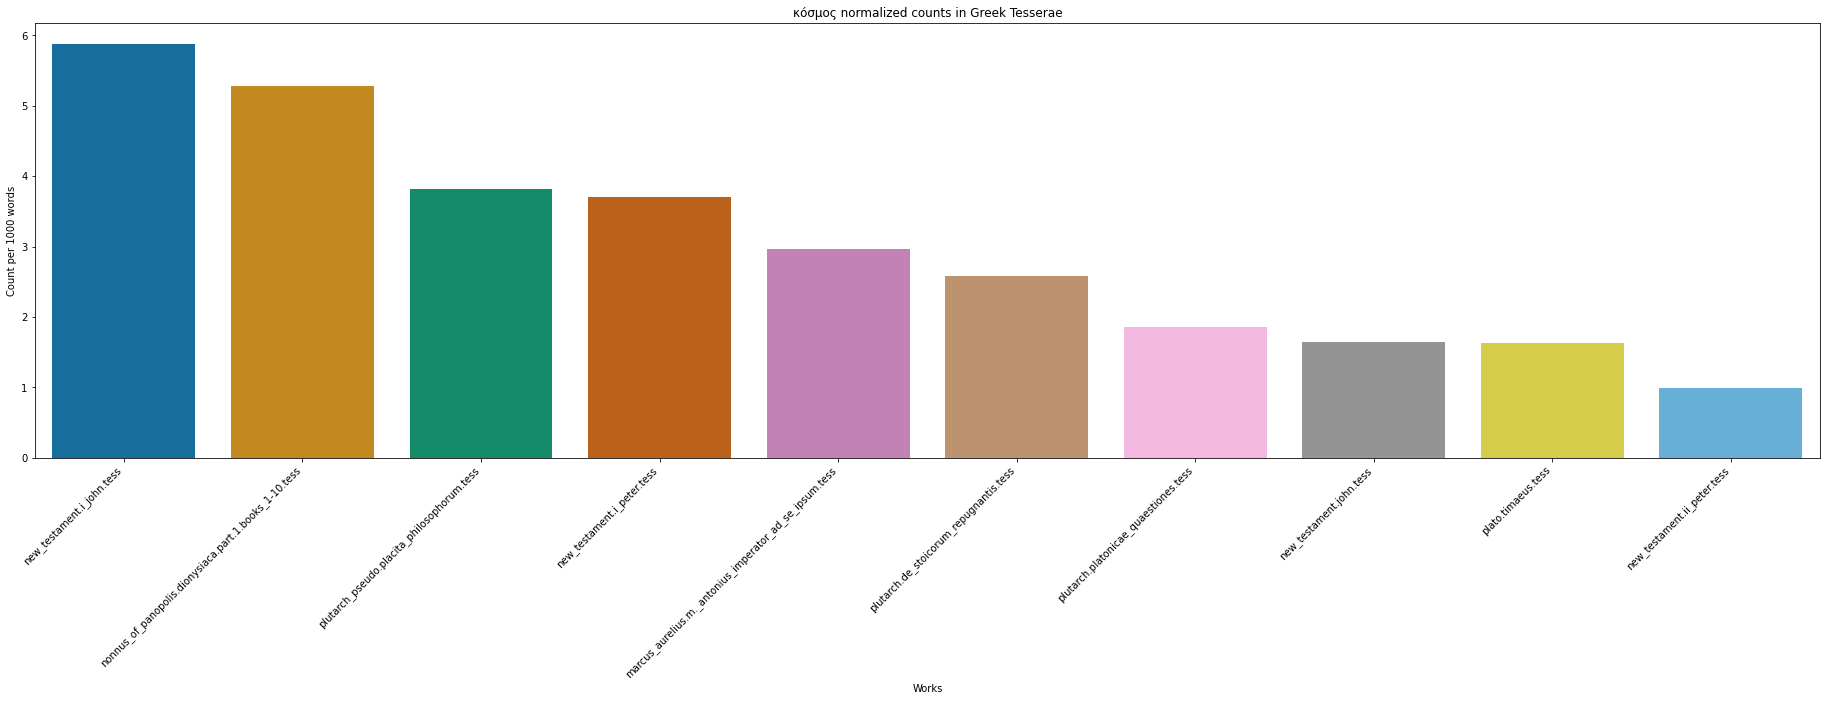

In [162]:
kosmos_norm_counts_sorted = dict(sorted(list(kosmos_norm_counts.items()), key=lambda x: x[1], reverse=True)[:10])
keys = list(kosmos_norm_counts_sorted.keys())
vals = list(kosmos_norm_counts_sorted.values())

plt.figure(figsize=(32, 8))
ax = sns.barplot(x=keys, y=vals, palette=pal);
plt.xlabel('Works')
plt.ylabel('Count per 1000 words')
plt.title('κόσμος normalized counts in Greek Tesserae')
ax.set_xticklabels(labels=keys, rotation=45, horizontalalignment='right');
# ax.set_yticks(range(0, max(vals), 2))
plt.show()

In [163]:
text = 'new_testament.i_john.tess'
print(kosmos_counts[text])
print(word_counts[text])

5
2478


In [164]:
max_kosmos = list(kosmos_counts.keys())[list(kosmos_counts.values()).index(max(kosmos_counts.values()))]
print(max_kosmos)
print(kosmos_counts[max_kosmos])
print(word_counts[max_kosmos])

aelius_aristides.orationes.tess
21
348507
